# Análisis de texto: Programa de Sebastián Piñera

In [2]:
#-*- coding: utf8 -*-
import nltk
import pandas as pd
import numpy as np
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

### Transformar PDF a texto

In [3]:
filename = 'programa-SP.pdf' 

#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()


### Tokenization

In [4]:
tokenizer = RegexpTokenizer("[\w']+")

In [5]:
programa = tokenizer.tokenize(text)
n_tokens=len(programa)
tokens=[]
for i in range(0,n_tokens):
    tokens.append(programa[i].lower())

### Stemming and Lemmatization

Lamentablemente la librería nltk no permite aplicar lemmatization en español. Para solucionar esto ocuparemos un diccionario de lemas obtenido desde http://www.lexiconista.com/Datasets/lemmatization-es.zip.

In [6]:
#stemmer = nltk.stem.snowball.SnowballStemmer('spanish')

In [7]:
lemmaDict = {}
with open('lemmatization-es.txt', 'rb') as f:
    data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
    data = [a.split(u'\t') for a in data]

for a in data:
    if len(a) > 1:
        lemmaDict[a[1]] = a[0]

def lemmatize(word):
    return lemmaDict.get(word, word + u'*')

In [15]:
lemas = []
print("Original   ->   Lema")
print("--------------------")
for word in tokens[:10]:
    word_lema = lemmatize(word)
    print("{}   ->   {}".format(word, word_lema))
for word in tokens:
    word_lema = lemmatize(word)
    lemas.append(word_lema)

Original   ->   Lema
--------------------
programa   ->   programar
de   ->   de*
gobierno   ->   gobernar
2018   ->   2018*
2022   ->   2022*
sebastián   ->   sebastián*
piñera   ->   piñera*
echenique   ->   echenique*
construyamos   ->   construir
tiempos   ->   tiempo


## Análisis

#### Eliminar Stopwords

In [31]:
from nltk.corpus import stopwords
spanish = stopwords.words('spanish')
spanish.extend(['si', 'programa', 'ello','sistema','cada','sino','sido','hacia','sólo','parte','caso','parir','comer','casar','mercar'])

def remove_stopwords(tokens):
    filtro = [w for w in tokens if not w in spanish]
    return filtro

tokens_filtro = remove_stopwords(lemas)
tokens_filtro = [w.replace("*", "") for w in tokens_filtro]
tokens_filtro = [w.replace("programar", "programa") for w in tokens_filtro]
tokens_filtro = [w.replace("gobernar", "gobierno") for w in tokens_filtro]
tokens_filtro = [w.replace("desarrollar", "desarrollo") for w in tokens_filtro]
tokens_filtro = [w.replace("personar", "personas") for w in tokens_filtro]
tokens_filtro = [w.replace("libertar", "libertad") for w in tokens_filtro]

tokens_filtro = [w for w in tokens_filtro if len(w)>3]

#### Frecuencia de palabras

In [28]:
from nltk import FreqDist
dist_programa = FreqDist(tokens_filtro) 
most = dist_programa.most_common(10)
most
dist_programa['economía']


20

In [14]:
len(tokens_filtro)

26282

#### Wordcloud

In [32]:
from wordcloud import WordCloud
font_path = r'C:\Windows\Fonts\trebuc.ttf'
palabras_programa = ' '.join(tokens_filtro)
programa_wordcloud = WordCloud(stopwords=spanish, width=800, height=500, font_path=font_path, max_words=len(tokens_filtro), relative_scaling=0.4,min_font_size=8, background_color='white',random_state=4).generate(palabras_programa)

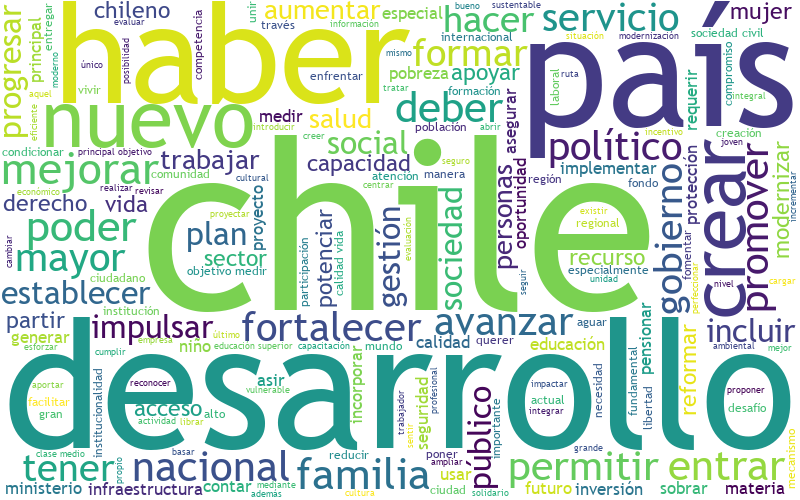

In [33]:
programa_wordcloud.to_image()

In [337]:
programa_wordcloud.to_file("nube_programa.png")